In [1]:
%pip install wbdata
%pip install pandas
%pip install iso3166
%pip install cufflinks
%pip install eep153_tools
%pip install plotly
%pip install kagglehub
%pip install os
import wbdata
import pandas as pd
import geopandas as gpd
import math
import iso3166
import plotly.offline as py
from scipy.optimize import newton
import plotly.graph_objs as go
import numpy as np
import cufflinks as cf
from matplotlib import animation as ani
import matplotlib.pyplot as plt
import kagglehub
import os
cf.go_offline()

  Using cached wbdata-1.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached backoff-2.2.1-py3-none-any.whl.metadata (14 kB)
  Using cached dateparser-1.2.1-py3-none-any.whl.metadata (29 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.8.10-py3-none-any.whl.metadata (25 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached wbdata-1.0.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
Using cached dateparser-1.2.1-py3-none-any.whl (295 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2024.1
    Uninstalling pytz-2024.1:
      Successfully uninstalled pytz-2024.1
ERROR: pi

Key '8396422464894758348' not in persistent cache.
Key '8168902463520667758' not in persistent cache.
Key '1478961757207436259' not in persistent cache.
Key '363603869202397912' not in persistent cache.
Key '526935351069195182' not in persistent cache.
Key '-3163355904884574644' not in persistent cache.
Key '4046004865617079451' not in persistent cache.
Key '5467561538171144990' not in persistent cache.
Key '-4626269512656942803' not in persistent cache.
Key '-4372032100107616840' not in persistent cache.
Key '4619880072684285582' not in persistent cache.
Key '1118249596009782275' not in persistent cache.
Key '1735409792357851884' not in persistent cache.
Key '-8243748320162777368' not in persistent cache.
Key '5254479306905736153' not in persistent cache.
Key '6676035979459801692' not in persistent cache.
Key '-4561347323748095829' not in persistent cache.
Key '5724009573321560615' not in persistent cache.
Key '-8088307097835068385' not in persistent cache.
Key '-6654000930245079801' 

In [2]:
# Load the dataset
file_path = "south-america_652.geojson"
southamerica = gpd.read_file(file_path)
# Looking at dataset
southamerica

ERROR 1: PROJ: proj_create_from_database: Open of /srv/conda/share/proj failed


,name,cartodb_id,created_at,updated_at,geometry
0,French Guiana (France),1,2013-11-28 06:32:17+01:00,2013-11-28 06:33:02+01:00,"POLYGON ((-52.28892 4.87612, -52.32461 4.7709,..."
1,Brazil,33,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-48.48589 -27.76699, -48.55459..."
2,Chile,41,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-67.5752 -55.88965, -67.61143 ..."
3,Argentina,9,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882..."
4,Bolivia,32,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"POLYGON ((-58.15977 -20.16465, -58.13994 -19.9..."
5,Colombia,48,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-78.11372 2.54175, -78.14082 2..."
6,Ecuador,64,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-80.13159 -2.97314, -80.15068 ..."
7,Guyana,90,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"POLYGON ((-57.19478 5.54844, -57.2479 5.48525,..."
8,Peru,171,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"POLYGON ((-69.96592 -4.23594, -69.97202 -4.301..."
9,Paraguay,179,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"POLYGON ((-58.15977 -20.16465, -58.13779 -20.2..."


<Axes: >

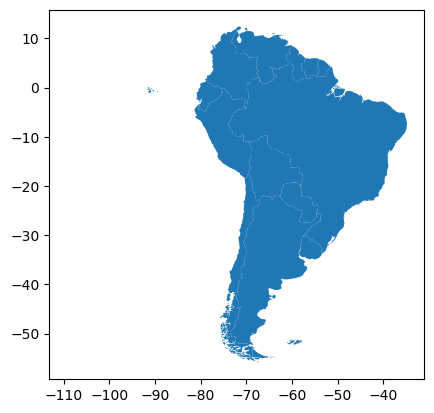

In [3]:
#Plotting Dataset
southamerica.plot()

In [4]:
#Filtering Dataset
df = southamerica
filtered_df = df[df['name'].isin(["Brazil", "Peru", "Ecuador", "Bolivia"])]
filtered_df = filtered_df.rename(columns={"name": "Country"})
print(filtered_df)

   Country  cartodb_id                created_at                updated_at  \
1   Brazil          33 2013-11-27 20:16:22+01:00 2013-11-27 20:16:23+01:00   
4  Bolivia          32 2013-11-27 20:16:22+01:00 2013-11-27 20:16:23+01:00   
6  Ecuador          64 2013-11-27 20:16:22+01:00 2013-11-27 20:16:23+01:00   
8     Peru         171 2013-11-27 20:16:22+01:00 2013-11-27 20:16:23+01:00   

                                            geometry  
1  MULTIPOLYGON (((-48.48589 -27.76699, -48.55459...  
4  POLYGON ((-58.15977 -20.16465, -58.13994 -19.9...  
6  MULTIPOLYGON (((-80.13159 -2.97314, -80.15068 ...  
8  POLYGON ((-69.96592 -4.23594, -69.97202 -4.301...  


In [5]:
#Loading Dataset
path = kagglehub.dataset_download("nelgiriyewithana/countries-of-the-world-2023")

files = os.listdir(path)
print("Files in dataset:", files)

file_name = [f for f in files if f.endswith(".csv")][0]
file_path = os.path.join(path, file_name)

# Looking at dataset
population = pd.read_csv(file_path)
population

Files in dataset: ['world-data-2023.csv']


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


Text(0.5, 1.0, 'Density of Peru, Ecuador, Brazil, and Bolivia in 2023')

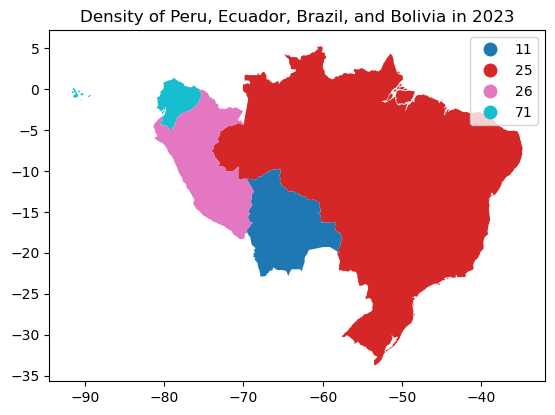

In [6]:
# Merging two datasets
merged_df = filtered_df.merge(population, on = "Country")
merged_df.plot(column = "Density\n(P/Km2)", legend = "true")
plt.title("Density of Peru, Ecuador, Brazil, and Bolivia in 2023") 

In [7]:
# Load the dataset
file_path = "population.csv"
southamericapast = pd.read_csv(file_path)

# Renaming Column 
southamericapast = southamericapast.rename(columns={"Country Name": "Country"})

# Filter for Peru, Bolivia, Brazil, and Ecuador for Year 1960
filtered_southamerica1960 = southamericapast[
    (southamericapast["Country"].isin(["Peru", "Bolivia", "Brazil", "Ecuador"])) &
    (southamericapast["Year"] == 1960)]

# Input Land Size for each country to find density
filtered_southamerica1960["Land Size (km²)"] = [1098581, 8514215, 283561, 1285220]

#Create a new column for density by dividing population by land size
filtered_southamerica1960["Density (P/Km^2)"] = filtered_southamerica1960["Value"] / filtered_southamerica1960["Land Size (km²)"]
filtered_southamerica1960

,Country,Country Code,Year,Value,Land Size (km²),Density (P/Km^2)
1792,Bolivia,BOL,1960,3702323.0,1098581,3.370096
1856,Brazil,BRA,1960,72388126.0,8514215,8.502032
4224,Ecuador,ECU,1960,4590891.0,283561,16.190135
11840,Peru,PER,1960,10174127.0,1285220,7.916253


Text(0.5, 1.0, 'Density of Peru, Ecuador, Brazil, and Bolivia in 2023')

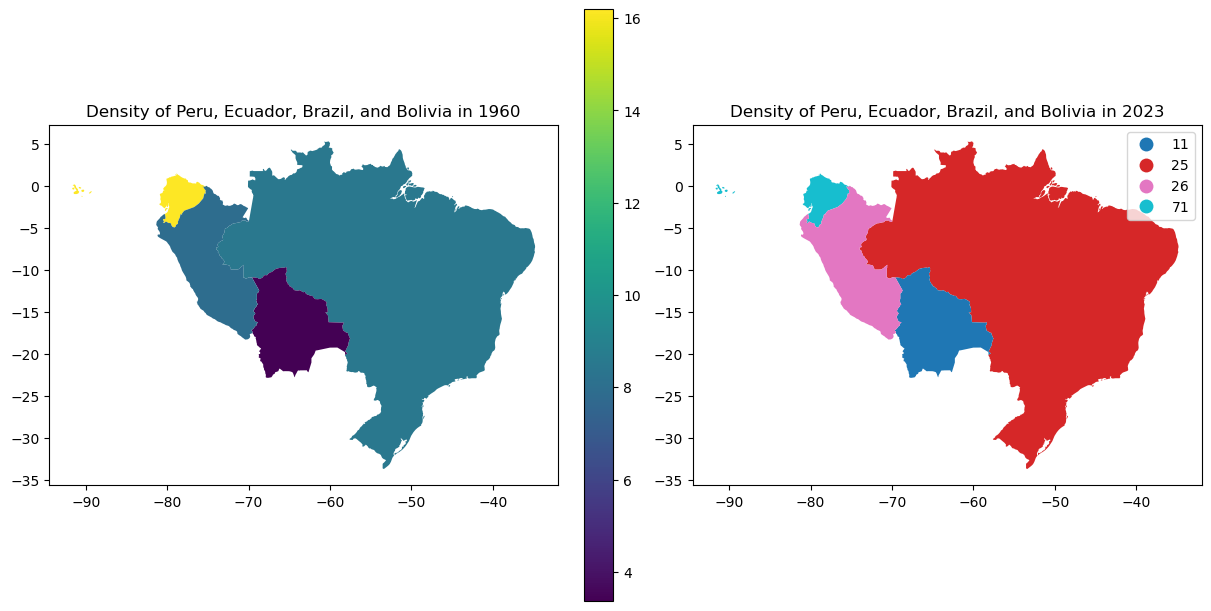

In [8]:
# Create graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6),constrained_layout=True)

# Population Density in 1960
merged_df_1960 = filtered_df.merge(filtered_southamerica1960, on="Country")
merged_df_1960.plot(column="Density (P/Km^2)",legend=True, ax=axes[0])
axes[0].set_title("Density of Peru, Ecuador, Brazil, and Bolivia in 1960")

# Population Density in 2023
merged_df = filtered_df.merge(population, on="Country")
merged_df.plot(column="Density\n(P/Km2)",legend=True,ax=axes[1])
axes[1].set_title("Density of Peru, Ecuador, Brazil, and Bolivia in 2023")

In [9]:
filtered_southamerica_Peru = southamericapast[southamericapast["Country"] == "Peru"]
filtered_southamerica_Brazil = southamericapast[southamericapast["Country"] == "Brazil"]
filtered_southamerica_Ecuador = southamericapast[southamericapast["Country"] == "Ecuador"]
filtered_southamerica_Bolivia = southamericapast[southamericapast["Country"] == "Bolivia"]

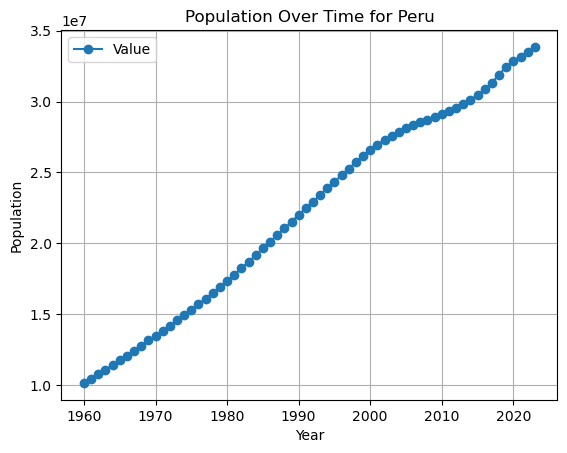

In [10]:
filtered_southamerica_Peru.plot(x='Year', y='Value', kind='line', marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Time for Peru')
plt.grid(True)

plt.show()

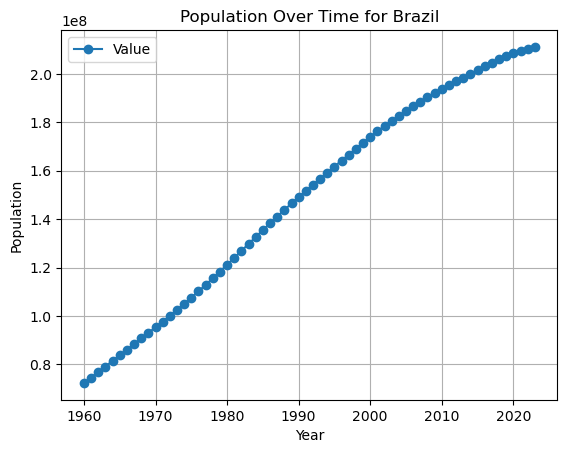

In [11]:
filtered_southamerica_Brazil.plot(x='Year', y='Value', kind='line', marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Time for Brazil')
plt.grid(True)

plt.show()

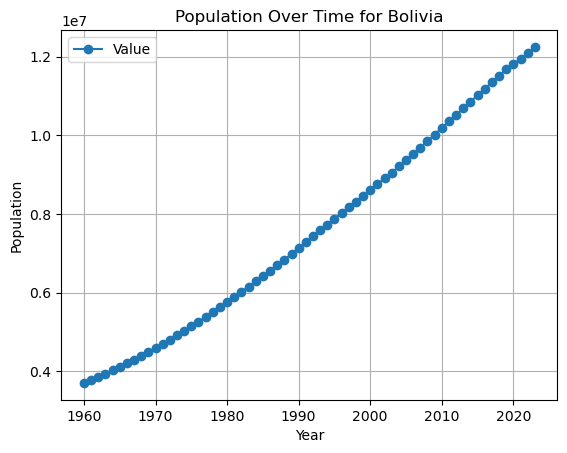

In [12]:
filtered_southamerica_Bolivia.plot(x='Year', y='Value', kind='line', marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Time for Bolivia')
plt.grid(True)

plt.show()

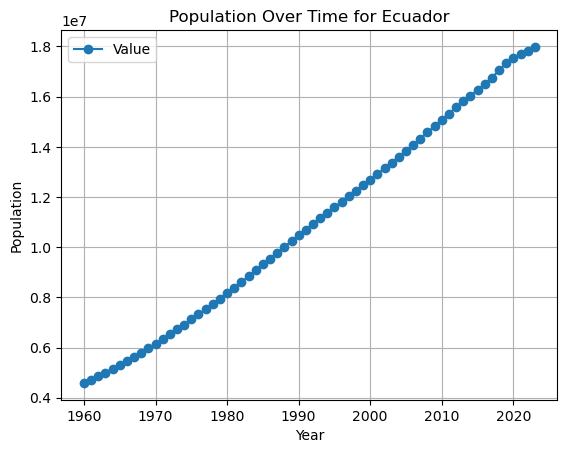

In [13]:
filtered_southamerica_Ecuador.plot(x='Year', y='Value', kind='line', marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Time for Ecuador')
plt.grid(True)

plt.show()

In [14]:
variable_labels = {"SP.POP.TOTL":"World Population"}

world = wbdata.get_dataframe(variable_labels, country="WLD",parse_dates=True)

# Print a few years' data
world.head()

,World Population
date,
2023-01-01,8.061876e+09
2022-01-01,7.989982e+09
2021-01-01,7.921184e+09
2020-01-01,7.856139e+09
2019-01-01,7.776892e+09


In [15]:
variable_labels = {"SP.RUR.TOTL":"Rural Population"}

Brazil_rural_population = wbdata.get_dataframe(variable_labels, country="BRA",parse_dates=True)

# Print a few years' data
Brazil_rural_population

,Rural Population
date,
2023-01-01,25784506.0
2022-01-01,26172633.0
2021-01-01,26577264.0
2020-01-01,26973587.0
2019-01-01,27334331.0
...,...
1964-01-01,40696219.0
1963-01-01,40312012.0
1962-01-01,39893871.0


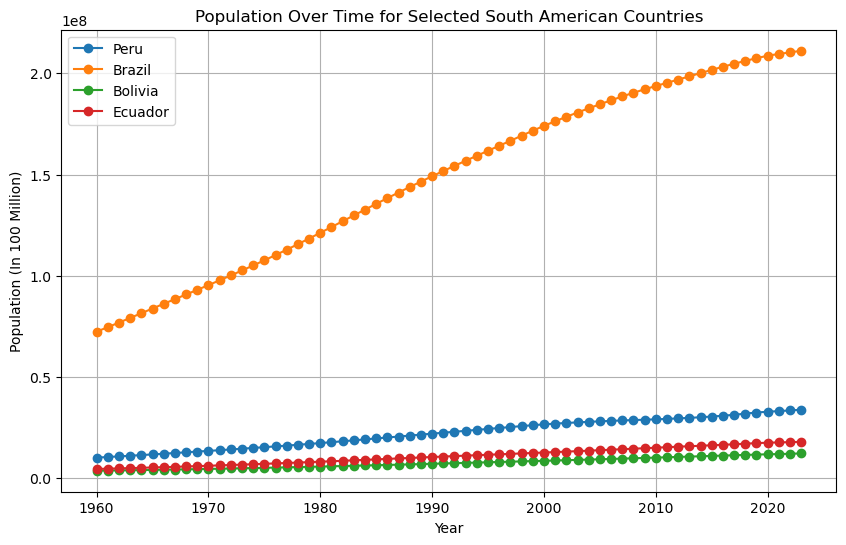

In [16]:
import matplotlib.pyplot as plt

# Ensure Year column is numeric for all dataframes
for df in [filtered_southamerica_Peru, filtered_southamerica_Brazil, 
           filtered_southamerica_Bolivia, filtered_southamerica_Ecuador]:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert Year column to numeric, coerce errors
    df.dropna(subset=['Year', 'Value'], inplace=True)  # Remove rows with NaN values

# Plot each country's population on the same figure
plt.figure(figsize=(10, 6))  # Set figure size

# Define dataset dictionary for cleaner plotting
datasets = {
    "Peru": filtered_southamerica_Peru,
    "Brazil": filtered_southamerica_Brazil,
    "Bolivia": filtered_southamerica_Bolivia,
    "Ecuador": filtered_southamerica_Ecuador
}

# Iterate over datasets and plot
for country, df in datasets.items():
    plt.plot(df['Year'], df['Value'], marker='o', linestyle='-', label=country)

# Add labels, title, and grid
plt.xlabel('Year')
plt.ylabel('Population (In 100 Million)')
plt.title('Population Over Time for Selected South American Countries')
plt.grid(True)
plt.legend()  # Show legend to differentiate countries

# Display the plot
plt.show()

In [33]:
import numpy as np
import pandas as pd
from scipy.optimize import newton
import pandas as pd
pd.options.plotting.backend = 'plotly'

# Play with these constants
## for exponential
P0 = 1
r = 0.0051  # Rate of population growth

## for line
F0 = 10
m = 100

def food_production(t,m=m):
    return F0+m*t

def population(t,r=r):
    return P0*np.exp(r*t)

def choose_xaxis(r,m,x0=10):
    """
    Find a range of x so that curves intersect
    """
    tstar = -1
    try:
        while tstar <= 0:
            tstar = newton(lambda t: food_production(t,m) - population(t,r),x0,maxiter=1000)
            x0 = x0*10
        return np.linspace(0,tstar*1.1,100)
    except RuntimeError: # Failed to find root
        return np.linspace(0,1000,100)

T = choose_xaxis(r,m)

df = pd.DataFrame({'Time': T,
                   'Food production':[food_production(t) for t in T],
                   'Brazil':[population(t) for t in T]}).set_index('Time')
df.plot()

In [21]:
vars = {"AG.LND.FRST.ZS":"Deforestation"}

use=["BRA","ECU","BOL","PER"]

deforestation = wbdata.get_dataframe(vars,country=use,parse_dates=True).squeeze().unstack('country')

deforestation = deforestation.loc["1990":]

plot = deforestation.plot(title="Forest Area Over Time", labels={"index": "Year", "value": "Country's Forest (%)"})
plot.show()
deforestation.head()

country,Bolivia,Brazil,Ecuador,Peru
date,,,,
1990-01-01,53.359845,70.458021,52.854392,59.725422
1991-01-01,53.110299,70.005654,52.528677,59.635523
1992-01-01,52.860753,69.553288,52.202962,59.545623
1993-01-01,52.611207,69.100922,51.877247,59.455724
1994-01-01,52.361662,68.648556,51.551532,59.365825


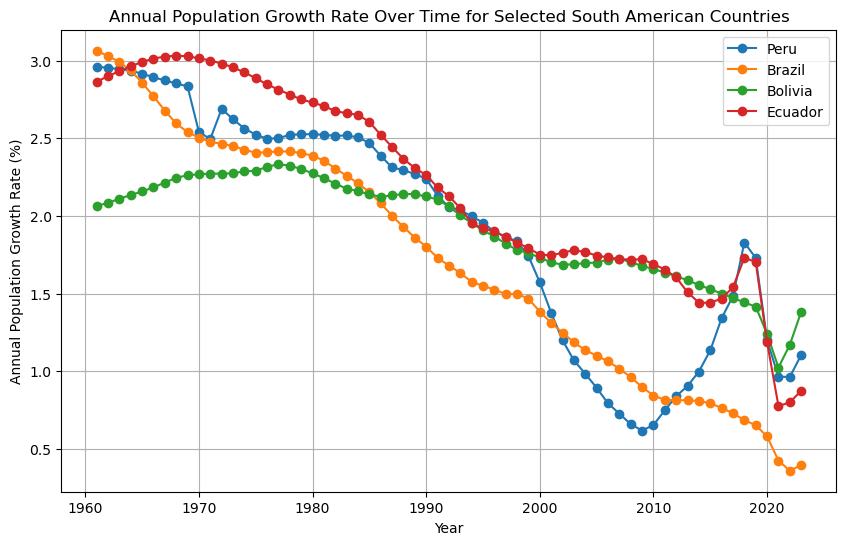

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Year column is numeric for all dataframes
for df in [filtered_southamerica_Peru, filtered_southamerica_Brazil, 
           filtered_southamerica_Bolivia, filtered_southamerica_Ecuador]:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert Year to numeric
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')  # Ensure population values are numeric
    df.dropna(subset=['Year', 'Value'], inplace=True)  # Remove NaN rows
    df.sort_values(by='Year', inplace=True)  # Ensure data is sorted by year

    # Calculate annual population growth rate
    df['Growth Rate (%)'] = df['Value'].pct_change() * 100  # Percentage change

# Plot each country's population growth rate
plt.figure(figsize=(10, 6))  # Set figure size

# Define dataset dictionary for cleaner plotting
datasets = {
    "Peru": filtered_southamerica_Peru,
    "Brazil": filtered_southamerica_Brazil,
    "Bolivia": filtered_southamerica_Bolivia,
    "Ecuador": filtered_southamerica_Ecuador
}

# Iterate over datasets and plot growth rates
for country, df in datasets.items():
    plt.plot(df['Year'], df['Growth Rate (%)'], marker='o', linestyle='-', label=country)

# Add labels, title, and grid
plt.xlabel('Year')
plt.ylabel('Annual Population Growth Rate (%)')
plt.title('Annual Population Growth Rate Over Time for Selected South American Countries')
plt.grid(True)
plt.legend()  # Show legend to differentiate countries

# Display the plot
plt.show()


In [25]:
# Fetch deforForest = pd.read_csv(file_path2, delimiter=";")  # Try semicolon if commas fail
#Forestation data (Forest Area %)
vars = {"AG.LND.FRST.ZS": "Forest Area (%)"}
countries = ["BRA", "ECU", "BOL", "PER"]

# Get deforestation data and reshape it
deforestation

country,Bolivia,Brazil,Ecuador,Peru
date,,,,
1990-01-01,53.359845,70.458021,52.854392,59.725422
1991-01-01,53.110299,70.005654,52.528677,59.635523
1992-01-01,52.860753,69.553288,52.202962,59.545623
1993-01-01,52.611207,69.100922,51.877247,59.455724
1994-01-01,52.361662,68.648556,51.551532,59.365825
1995-01-01,52.112116,68.196190,51.225816,59.275926
1996-01-01,51.862570,67.743823,50.900101,59.186027
1997-01-01,51.613024,67.291457,50.574386,59.096127
1998-01-01,51.363478,66.839091,56.010799,59.006228


In [23]:
vars = {"AG.LND.FRST.ZS":"Deforestation"}

use=["BRA","ECU","BOL","PER"]

deforestation = wbdata.get_dataframe(vars,country=use,parse_dates=True).squeeze().unstack('country')

deforestation = deforestation.loc["1990":]

plot = deforestation.plot(title="Forest Area Over Time", labels={"index": "Year", "value": "Country's Forest (%)"})
plot.show()
deforestation.head()

country,Bolivia,Brazil,Ecuador,Peru
date,,,,
1990-01-01,53.359845,70.458021,52.854392,59.725422
1991-01-01,53.110299,70.005654,52.528677,59.635523
1992-01-01,52.860753,69.553288,52.202962,59.545623
1993-01-01,52.611207,69.100922,51.877247,59.455724
1994-01-01,52.361662,68.648556,51.551532,59.365825


In [32]:
file_path_fertility = "Fertility.csv"
Fertility = pd.read_csv(file_path_fertility)

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 69
